
# SVM (Support Vector Machines)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SVM-Intro" data-toc-modified-id="SVM-Intro-1">SVM Intro</a></span><ul class="toc-item"><li><span><a href="#How-does-an-SVM-work?" data-toc-modified-id="How-does-an-SVM-work?-1.1">How does an SVM work?</a></span></li><li><span><a href="#What-are-Support-Vectors?" data-toc-modified-id="What-are-Support-Vectors?-1.2">What are Support Vectors?</a></span></li><li><span><a href="#Here's-a-short-and-interesting-video-on-SVMs" data-toc-modified-id="Here's-a-short-and-interesting-video-on-SVMs-1.3">Here's a short and interesting video on SVMs</a></span></li><li><span><a href="#What-are-some-popular-applications-of-SVM?" data-toc-modified-id="What-are-some-popular-applications-of-SVM?-1.4">What are some popular applications of SVM?</a></span></li></ul></li><li><span><a href="#Project-Intro" data-toc-modified-id="Project-Intro-2">Project Intro</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-3">Load the Data</a></span><ul class="toc-item"><li><span><a href="#Cancer-Data" data-toc-modified-id="Cancer-Data-3.1">Cancer Data</a></span></li><li><span><a href="#Load-Data-From-CSV-File" data-toc-modified-id="Load-Data-From-CSV-File-3.2">Load Data From CSV File</a></span></li></ul></li><li><span><a href="#Data-Pre-processing-and-Selection" data-toc-modified-id="Data-Pre-processing-and-Selection-4">Data Pre-processing and Selection</a></span><ul class="toc-item"><li><span><a href="#Data-selection" data-toc-modified-id="Data-selection-4.1">Data selection</a></span></li></ul></li><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-5">Train/Test Split</a></span><ul class="toc-item"><li><span><a href="#Why-Test/Train-Split?" data-toc-modified-id="Why-Test/Train-Split?-5.1">Why Test/Train Split?</a></span></li><li><span><a href="#Why-do-we-need-a-kernel-function?" data-toc-modified-id="Why-do-we-need-a-kernel-function?-5.2">Why do we need a kernel function?</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6">Evaluation</a></span><ul class="toc-item"><li><span><a href="#What-is-a-confusion-matrix?" data-toc-modified-id="What-is-a-confusion-matrix?-6.1">What is a confusion matrix?</a></span></li></ul></li><li><span><a href="#Exercise---Let's-try-an-alternate-kernel-function" data-toc-modified-id="Exercise---Let's-try-an-alternate-kernel-function-7">Exercise - Let's try an alternate kernel function</a></span></li></ul></div>

## SVM Intro

- Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. 
- Support vector machine is highly preferred by many as it **produces significant accuracy with less computation power**. 
- Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is **widely used in classification objectives**.

### How does an SVM work?

An SVM finds a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. 

Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

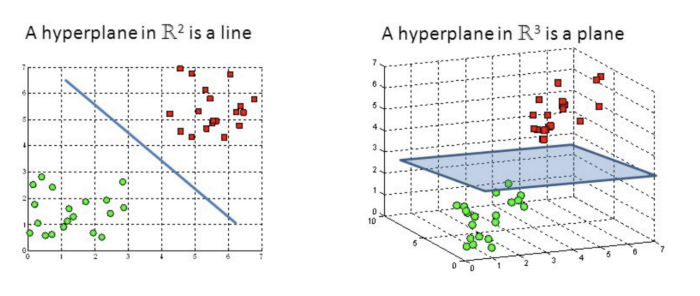


### What are Support Vectors?

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

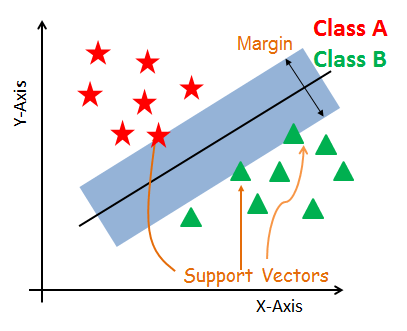

### Here's a short and interesting video on SVMs

In [12]:
## Run this cell (shift+enter) to see the video

from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/Y6RRHw9uN9o", width="814", height="509")

### What are some popular applications of SVM?

- __Face detection__ – SVMc classify parts of the image as a face and non-face and create a square boundary around the face.
- __Text and hypertext categorization__ – SVMs allow Text and hypertext categorization for both inductive and transductive models. They use training data to classify documents into different categories. It categorizes on the basis of the score generated and then compares with the threshold value.
- __Classification of images__ – Use of SVMs provides better search accuracy for image classification. It provides better accuracy in comparison to the traditional query-based searching techniques.
- __Bioinformatics__ – It includes protein classification and cancer classification. We use SVM for identifying the classification of genes, patients on the basis of genes and other biological problems.
- __Protein fold and remote homology detection__ – Apply SVM algorithms for protein remote homology detection.
- __Handwriting recognition__ – We use SVMs to recognize handwritten characters used widely.

To read more click [here](https://data-flair.training/blogs/applications-of-svm/).

## Project Intro

In this project, we will use an SVM (Support Vector Machine) to build and train a model that predicts whether a cancer cell sample is benign or malignant. We have been given a few hundred cell samples that are classified into benign or malignant. We will use this data to train our SVM classifier and make predictions.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [13]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Load the Data

###  Cancer Data 
For the purposes of this example, we're using a dataset that has a relatively small number of predictors in each record. The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. 

### Load Data From CSV File  

In [14]:
samples_df = pd.read_csv("../data/cell_samples.csv")
samples_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
samples_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID             699 non-null int64
Clump          699 non-null int64
UnifSize       699 non-null int64
UnifShape      699 non-null int64
MargAdh        699 non-null int64
SingEpiSize    699 non-null int64
BareNuc        699 non-null object
BlandChrom     699 non-null int64
NormNucl       699 non-null int64
Mit            699 non-null int64
Class          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


- The ID field contains the patient identifiers
- The characteristics of the cell samples from each patient are contained in fields Clump to Mit
- The values are graded from 1 to 10, with 1 being the closest to benign
- The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4)

Lets do a preliminary visualization. How does the distribution of the classes based on Clump thickness and Uniformity of cell size look?

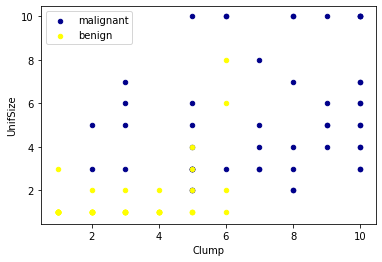

In [16]:
ax = samples_df[samples_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
samples_df[samples_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Data Pre-processing and Selection

Lets first look at columns data types:

In [17]:
samples_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [18]:
samples_df.isnull().sum() # Let's check if there are any null values in our dataframe

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

**BareNuc** seems to be the only column which has non-numeric data in it. Let's look at it more closely.

In [19]:
samples_df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

__BareNuc__ mostly contains numberic data. Looks like its classified as an object datatype because it has some non-numeric values. How many rows contain non-numeric values for the __BareNuc__ column?

In [20]:
samples_df['BareNuc'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

As you can see there are 16 rows with the value '?'. 

Let's drop those rows where __BareNuc__ has non-numeric values - 

In [21]:
samples_df = samples_df[pd.to_numeric(samples_df['BareNuc'], errors='coerce').notnull()]
samples_df['BareNuc'] = samples_df['BareNuc'].astype('int')
samples_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Data selection

Now, lets collect all our features into a 2D array (X).

In [22]:
feature_df = samples_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

In [39]:
samples_df['Class'] = samples_df['Class'].astype('int')
samples_df['Class'] = samples_df['Class'].replace(2,0)
samples_df['Class'] = samples_df['Class'].replace(4,1)
y = np.asarray(samples_df['Class'])
y [0:5]

array([0, 0, 0, 0, 0])

## Train/Test Split

Okay, we split our dataset into train and test set:

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


### Why Test/Train Split?

In [1]:
## Run this cell (shift+enter) to see the video

from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/fwY9Qv96DJY", width="814", height="509")

# Modeling (SVM with Scikit-learn)

### Why do we need a kernel function?

Sometimes the datapoints are not separated cleanly when represented in n-dimensional space (n = number of features). At times like these increasing the dimensionality or using the 'kernel trick' is a common tool used in machine learning.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d8/Kernel_yontemi_ile_veriyi_daha_fazla_dimensiyonlu_uzaya_tasima_islemi.png" width="500" height="300" align="left">

Here's a simple explanation video - 

In [25]:
## Run this cell (shift+enter) to see the video

from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/vMmG_7JcfIc ", width="814", height="509")

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [42]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/Users/anikannal/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [43]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 1, 0, 1, 0])

## Evaluation

We will be using a confusion matrix to evaluate the accuracy of our SVM classifier. Here's a quick primer on a confusion matrix.

### What is a confusion matrix?

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

<img src="https://upload.wikimedia.org/wikipedia/commons/3/32/Binary_confusion_matrix.jpg" width="300" height="300" align="left">

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


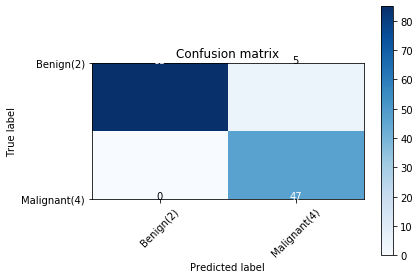

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix')

What does this matrix mean?

- 85 values correctly predicted as Benign 
- 0 values were falsely predicted as Benign
- 47 values were correctly predicted as Malignant
- 5 values were falsely predicted as Malignant

You can also easily use the __f1_score__ fron sklearn library:

In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

Lets try jaccard index for accuracy:

In [52]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.9038461538461539

## Exercise - Let's try an alternate kernel function
Let's rebuild the model, but this time with a __linear__ kernel? We can use __ kernel='linear'__ option, when we define the svm. How the accuracy changes with the new kernel function?

In [51]:

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2))


Avg F1-score: 0.9639
Jaccard score: 0.9038
